In [1]:
import numpy as np
import pandas as pd
from datetime import datetime, date
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('float_format', '{0:,.2f}'.format)

In [2]:
data = pd.read_csv("avocado.csv")
data.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,"64,236.62","1,036.74","54,454.85",48.16,"8,696.87","8,603.62",93.25,0.00,conventional,2015,Albany
1,1,2015-12-20,1.35,"54,876.98",674.28,"44,638.81",58.33,"9,505.56","9,408.07",97.49,0.00,conventional,2015,Albany
2,2,2015-12-13,0.93,"118,220.22",794.70,"109,149.67",130.50,"8,145.35","8,042.21",103.14,0.00,conventional,2015,Albany
3,3,2015-12-06,1.08,"78,992.15","1,132.00","71,976.41",72.58,"5,811.16","5,677.40",133.76,0.00,conventional,2015,Albany
4,4,2015-11-29,1.28,"51,039.60",941.48,"43,838.39",75.78,"6,183.95","5,986.26",197.69,0.00,conventional,2015,Albany


In [3]:
data =data.rename(columns = {"4046" : "TN_PLU_4046_Sold" , "4225" : "TN_PLU_4225_Sold" ,"4770" : "TN_PLU_4770_Sold" })
del data['Unnamed: 0']
data["Date"]= pd.to_datetime(data.Date, format= "%Y-%m-%d")

In [4]:
data.describe()

,AveragePrice,Total Volume,TN_PLU_4046_Sold,TN_PLU_4225_Sold,TN_PLU_4770_Sold,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,"18,249.00","18,249.00","18,249.00","18,249.00","18,249.00","18,249.00","18,249.00","18,249.00","18,249.00","18,249.00"
mean,1.41,"850,644.01","293,008.42","295,154.57","22,839.74","239,639.20","182,194.69","54,338.09","3,106.43","2,016.15"
std,0.40,"3,453,545.36","1,264,989.08","1,204,120.40","107,464.07","986,242.40","746,178.51","243,965.96","17,692.89",0.94
min,0.44,84.56,0.00,0.00,0.00,0.00,0.00,0.00,0.00,"2,015.00"
25%,1.10,"10,838.58",854.07,"3,008.78",0.00,"5,088.64","2,849.42",127.47,0.00,"2,015.00"
50%,1.37,"107,376.76","8,645.30","29,061.02",184.99,"39,743.83","26,362.82","2,647.71",0.00,"2,016.00"
75%,1.66,"432,962.29","111,020.20","150,206.86","6,243.42","110,783.37","83,337.67","22,029.25",132.50,"2,017.00"
max,3.25,"62,505,646.52","22,743,616.17","20,470,572.61","2,546,439.11","19,373,134.37","13,384,586.80","5,719,096.61","551,693.65","2,018.00"


In [5]:
data.type.value_counts()

conventional    9126
organic         9123
Name: type, dtype: int64

In [6]:
data.region.describe()

count        18249
unique          54
top       Columbus
freq           338
Name: region, dtype: object

In [7]:
## lets take out all the region data to have an accurate plot by state
data2=data[data['region']!="TotalUS"]
data2=data2[data2['region']!="SouthCentral"]
data2=data2[data2['region']!="Northeast"]
data2=data2[data2['region']!="NorthernNewEngland"]
data2=data2[data2['region']!="Southeast"]
data2=data2[data2['region']!="Northeast"]
data2=data2[data2['region']!="Midsouth"]
data2=data2[data2['region']!="WestTexNewMexico"]

### download a city, state data set from:
##https://simplemaps.com/data/us-cities
states = pd.read_csv("uscities.csv")
states= states[['city','state_name']]
region = pd.read_csv("state_region.csv")
names=data2.region.unique()


Correct_names=['Albany', 'Atlanta', 'Baltimore', 'Boise', 'Boston',
       'Buffalo', 'California', 'Charlotte', 'Chicago',
       'Cincinnati', 'Columbus', 'Dallas', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'Harrisburg',
       'Hartford', 'Houston', 'Indianapolis', 'Jacksonville',
       'Las Vegas', 'Los Angeles', 'Louisville', 'Miami',
       'Nashville', 'New Orleans', 'New York', 'Orlando',
       'Philadelphia', 'Phoenix', 'Pittsburgh', 'Plains',
       'Portland', 'Raleigh', 'Richmond', 'Roanoke',
       'Sacramento', 'San Diego', 'San Francisco', 'Seattle',
       'South Carolina', 'Spokane', 'StLouis', 'Syracuse', 'Tampa', 'West',
       ]
names_correct_names= pd.DataFrame({'City':names,'city_correct':Correct_names})

data3=pd.merge(data2, names_correct_names, left_on="region", right_on="City").drop('City', axis=1)
data3= pd.merge(data3, states, left_on='city_correct', right_on='city').drop(['city_correct'], axis=1)
data3= pd.merge(data3, region, left_on='state_name', right_on='State').drop(['state_name'], axis=1)
data3= data3.rename(columns={'Total Volume':'Volume'})
data3.head()


,Date,AveragePrice,Volume,TN_PLU_4046_Sold,TN_PLU_4225_Sold,TN_PLU_4770_Sold,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,city,State,Region
0,2015-12-27,1.33,"64,236.62","1,036.74","54,454.85",48.16,"8,696.87","8,603.62",93.25,0.00,conventional,2015,Albany,Albany,Wisconsin,Midwest
1,2015-12-20,1.35,"54,876.98",674.28,"44,638.81",58.33,"9,505.56","9,408.07",97.49,0.00,conventional,2015,Albany,Albany,Wisconsin,Midwest
2,2015-12-13,0.93,"118,220.22",794.70,"109,149.67",130.50,"8,145.35","8,042.21",103.14,0.00,conventional,2015,Albany,Albany,Wisconsin,Midwest
3,2015-12-06,1.08,"78,992.15","1,132.00","71,976.41",72.58,"5,811.16","5,677.40",133.76,0.00,conventional,2015,Albany,Albany,Wisconsin,Midwest
4,2015-11-29,1.28,"51,039.60",941.48,"43,838.39",75.78,"6,183.95","5,986.26",197.69,0.00,conventional,2015,Albany,Albany,Wisconsin,Midwest


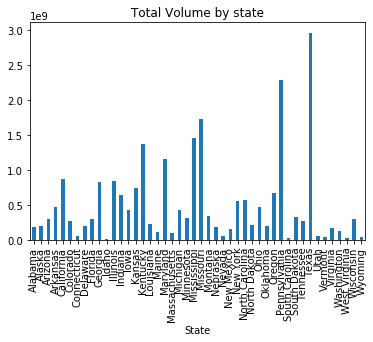

In [8]:
data3.groupby('State')['Volume'].agg('sum').plot(kind='bar', title='Total Volume by state')

In [9]:
data3.groupby(['Region','year'])['Volume'].agg('sum')

Region     year
Midwest    2015   1,834,980,016.83
           2016   2,073,684,535.46
           2017   2,133,618,431.58
           2018     594,052,260.71
Northeast  2015     894,530,846.30
           2016     983,935,174.66
           2017     997,279,447.73
           2018     275,521,684.05
South      2015   2,916,502,336.28
           2016   3,270,397,333.28
           2017   3,330,565,278.11
           2018     915,041,304.26
West       2015     865,057,148.44
           2016     966,185,974.34
           2017     981,983,981.10
           2018     266,983,243.54
Name: Volume, dtype: float64

Text(0.5, 1.0, '')

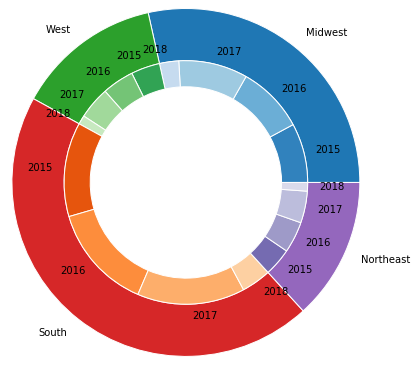

In [10]:
region_values= data3.groupby('Region')['Volume'].agg('sum')
year_values= data3.groupby(['Region','year'])['Volume'].agg('sum')

cmap_i= plt.get_cmap("tab20c")
cmap_o= plt.get_cmap("tab10")
outer_colors= cmap_o([0,2,3,4])

inner_colors = cmap_i([0,1,2,3,8,9,10,11,4,5,6,7,12,13,14,15])

fig, ax = plt.subplots()
labels_out = data3.Region.unique()
labels_in= ['2015', '2016', '2017', '2018']*4

ax.pie(region_values, radius=2, colors=outer_colors,
 wedgeprops=dict(width=0.6, edgecolor='w'), labels=labels_out)

ax.pie(year_values, radius=1.7-0.3, colors=inner_colors,
 wedgeprops=dict(width=0.3, edgecolor='w'), labels=labels_in)

ax.set_title("")

Text(0.5, 1.0, 'Extra Large Avocados Volume')

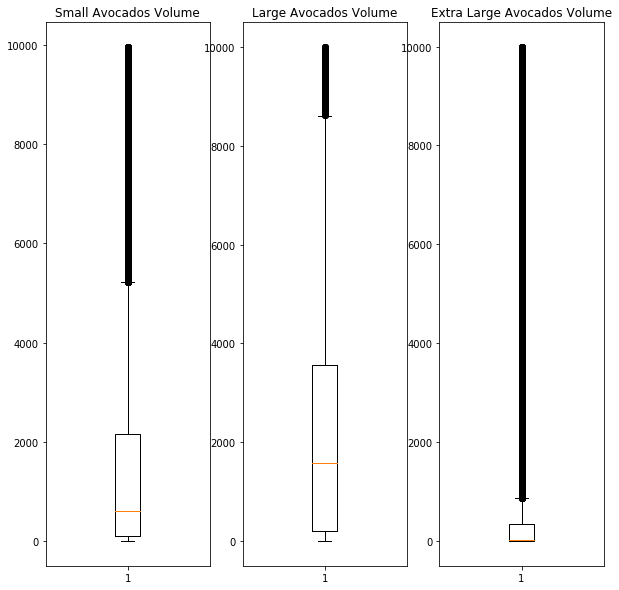

In [11]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(10,10))

ax1.boxplot(data3.TN_PLU_4046_Sold[data3.TN_PLU_4046_Sold<=10000])

ax2.boxplot(data3.TN_PLU_4225_Sold[data3.TN_PLU_4225_Sold<=10000])

ax3.boxplot(data3.TN_PLU_4770_Sold[data3.TN_PLU_4770_Sold<=10000])

ax1.set_title("Small Avocados Volume")
ax2.set_title("Large Avocados Volume")
ax3.set_title("Extra Large Avocados Volume")


Text(0.5, 1.0, 'Avocado Size Volume')

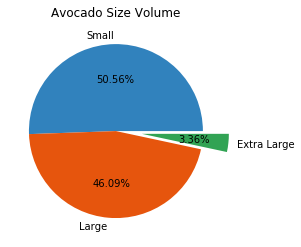

In [12]:
labels=['Small','Large','Extra Large']
values= [data3.TN_PLU_4046_Sold.sum(),data3.TN_PLU_4225_Sold.sum(),data3.TN_PLU_4770_Sold.sum()]
color_table= plt.get_cmap("tab20c")
color= color_table([0,4,8])
explode=[0,0,0.3]
plt.pie(values, labels=labels, colors= color, explode=explode, autopct='%.2f%%')
plt.title("Avocado Size Volume")

In [13]:
color_table= plt.get_cmap("tab20c")
color= color_table([0,2,1])


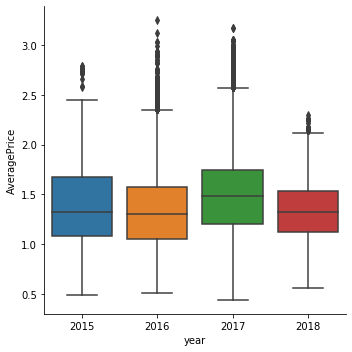

In [14]:
sns.catplot(x='year',y='AveragePrice',kind='box', data=data3)

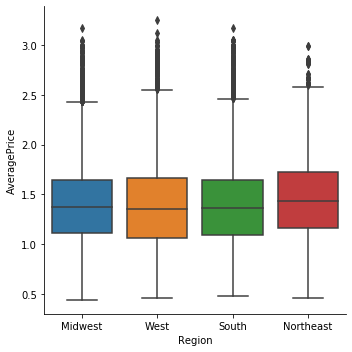

In [15]:
sns.catplot(x='Region',y='AveragePrice',kind='box', data=data3)

Text(0.5, 1.0, 'Averga Price distribution')

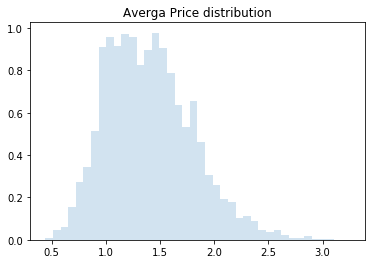

In [16]:
kwargs = dict(histtype='stepfilled', alpha=0.2, density=True, bins=40)
plt.hist(data3.AveragePrice, **kwargs)
plt.title("Averga Price distribution")

In [17]:
#### time series on the volume
import matplotlib.dates as mdates
from statsmodels.tsa.stattools import adfuller


data4= data3[['Date','AveragePrice','Volume']]
data4=data4.rename(columns={'AveragePrice':'Avg_Price','Volume':'Tot_Volume'})
data4.head()

,Date,Avg_Price,Tot_Volume
0,2015-12-27,1.33,"64,236.62"
1,2015-12-20,1.35,"54,876.98"
2,2015-12-13,0.93,"118,220.22"
3,2015-12-06,1.08,"78,992.15"
4,2015-11-29,1.28,"51,039.60"


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001928DB4EDC8>],
      dtype=object)

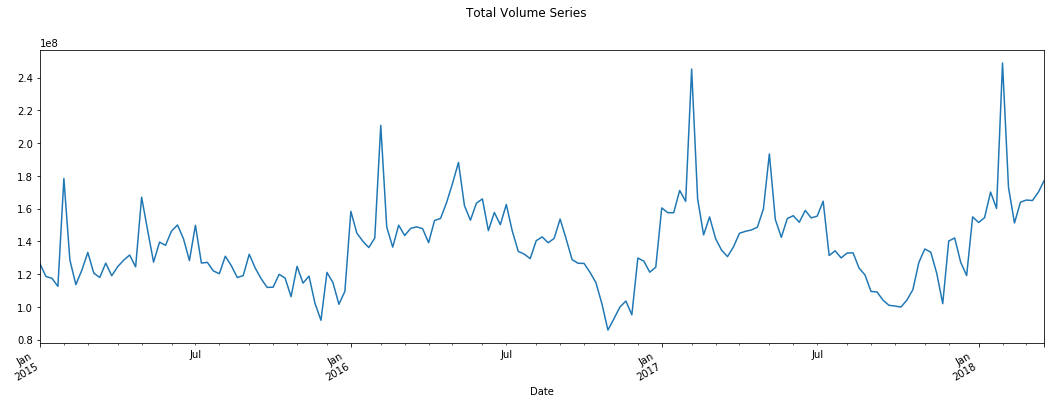

In [18]:
volume_ts=data4.groupby('Date')['Tot_Volume'].agg(['sum','min','max'])
volume_ts['sum'].plot(figsize=(18,6),subplots =True, title='Total Volume Series')

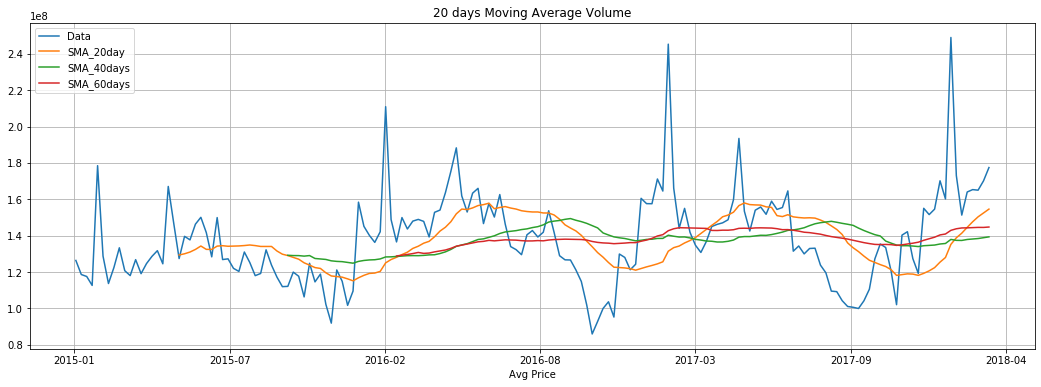

In [19]:
### simple moving average
newDF2= volume_ts.copy()
newDF2['SMA_20']= volume_ts['sum'].rolling(window=20).mean().round(2)
newDF2['SMA_40']= volume_ts['sum'].rolling(window=40).mean().round(2)
newDF2['SMA_60']= volume_ts['sum'].rolling(window=60).mean().round(2)

newDF2['mDate']= mdates.date2num(volume_ts.index)

fig,ax= plt.subplots(1, figsize=(18,6))


plt.plot(newDF2['mDate'], newDF2['sum'], label='Data')
plt.plot(newDF2['mDate'], newDF2['SMA_20'], label='SMA_20day')
plt.plot(newDF2['mDate'], newDF2['SMA_40'], label='SMA_40days')
plt.plot(newDF2['mDate'], newDF2['SMA_60'], label='SMA_60days')

ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

plt.title('20 days Moving Average Volume')
plt.xlabel('Days')
plt.xlabel('Avg Price')
plt.grid()
plt.legend()
plt.show()

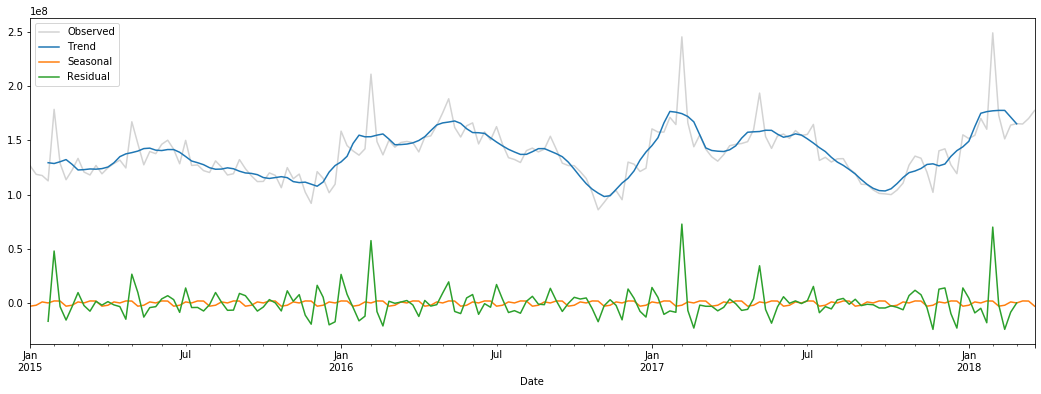

In [20]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompfreq= 6 ## 6 months seasonality
model= 'additive'
decomposition = seasonal_decompose(volume_ts['sum'].\
                                   interpolate('linear'),\
                                  period=decompfreq, model= model)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

df_decomposed = pd.DataFrame({'Trend': decomposition.trend,
                             'Seasonal' : decomposition.seasonal,
                             'Residual': decomposition.resid})

fig, ax = plt.subplots(figsize=(18,6))
volume_ts['sum'].plot(ax=ax, label='Observed', c='lightgrey')
df_decomposed.plot(ax=ax)
plt.legend(loc='upper left')


In [21]:
def test_stationarity(ts):
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(ts,autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

series1=volume_ts['sum']
test_stationarity(series1) ### great this ts looks stationary !!!
## lets see if we can lower that p value even though is pretty good
volume_ts['log']=np.log(volume_ts['sum'])
series2=volume_ts['log']
test_stationarity(series2) ## take the difference

volume_ts['log_diff']= volume_ts['log']- volume_ts['log'].shift()
tsv= volume_ts.copy()
tsv.dropna(inplace=True)
series3=tsv['log_diff']
test_stationarity(series3)
#### nice


Results of Dickey-Fuller Test:
Test Statistic                 -2.87
p-value                         0.05
#Lags Used                     13.00
Number of Observations Used   155.00
Critical Value (1%)            -3.47
Critical Value (5%)            -2.88
Critical Value (10%)           -2.58
dtype: float64
Results of Dickey-Fuller Test:
Test Statistic                 -3.46
p-value                         0.01
#Lags Used                      9.00
Number of Observations Used   159.00
Critical Value (1%)            -3.47
Critical Value (5%)            -2.88
Critical Value (10%)           -2.58
dtype: float64
Results of Dickey-Fuller Test:
Test Statistic                 -3.99
p-value                         0.00
#Lags Used                     12.00
Number of Observations Used   155.00
Critical Value (1%)            -3.47
Critical Value (5%)            -2.88
Critical Value (10%)           -2.58
dtype: float64


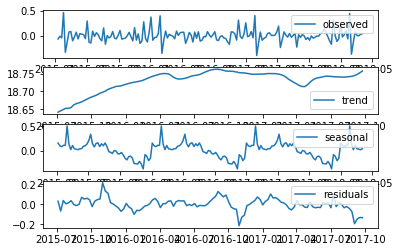

In [22]:
decomposition = seasonal_decompose(series2)
trend= decomposition.trend
seasonal= decomposition.seasonal
residual= decomposition.resid

plt.subplot(411)
plt.plot(tsv['log_diff'], label= 'observed')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label= 'trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label= 'seasonal')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label= 'residuals')
plt.legend(loc='best')


C:\Users\diego\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning


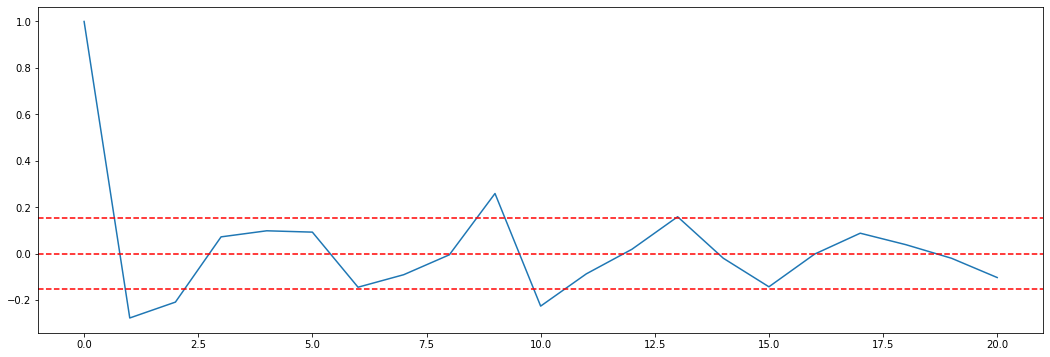

In [23]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(series3, nlags=20)
lag_pacf = pacf(series3, nlags=20, method='ols')
plt.subplots(figsize=(18,6))
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--', color= 'red')
plt.axhline(y=-1.96/np.sqrt(len(series3)), linestyle='--', color= 'red')
plt.axhline(y=1.96/np.sqrt(len(series3)), linestyle='--', color= 'red')

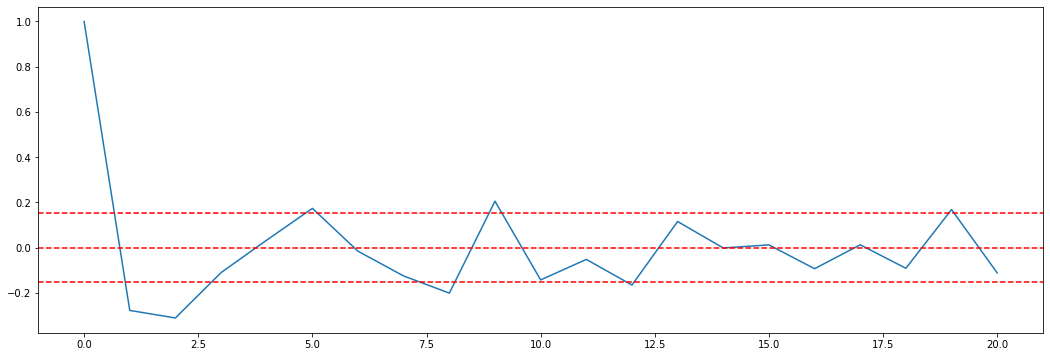

In [24]:
plt.subplots(figsize=(18,6))
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--', color= 'red')
plt.axhline(y=-1.96/np.sqrt(len(series3)), linestyle='--', color= 'red')
plt.axhline(y=1.96/np.sqrt(len(series3)), linestyle='--', color= 'red')

C:\Users\diego\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)
C:\Users\diego\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)


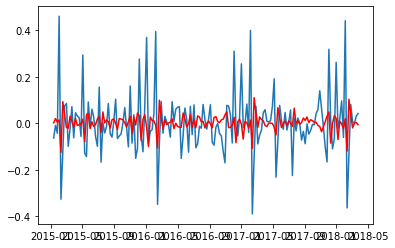

In [25]:
model= ARIMA(series2, order=(1,1,0))
results_AR= model.fit(disp=-1)
plt.plot(series3)
plt.plot(results_AR.fittedvalues, c='red')
predic_ARIMA_diff= pd.Series(results_AR.fittedvalues, copy=True)

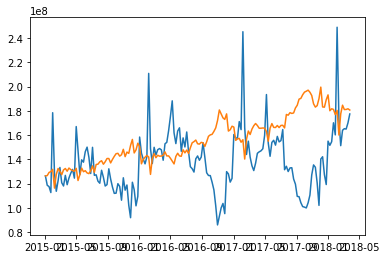

In [26]:
predic_ARIMA_csum= predic_ARIMA_diff.cumsum()
predict_ARIMA_log= pd.Series(series2.iloc[0], index= series2.index)
predict_ARIMA_log= predict_ARIMA_log.add(predic_ARIMA_csum, fill_value=0)
predicted_volume = np.exp(predict_ARIMA_log)
plt.plot(series1)
plt.plot(predicted_volume)


C:\Users\diego\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


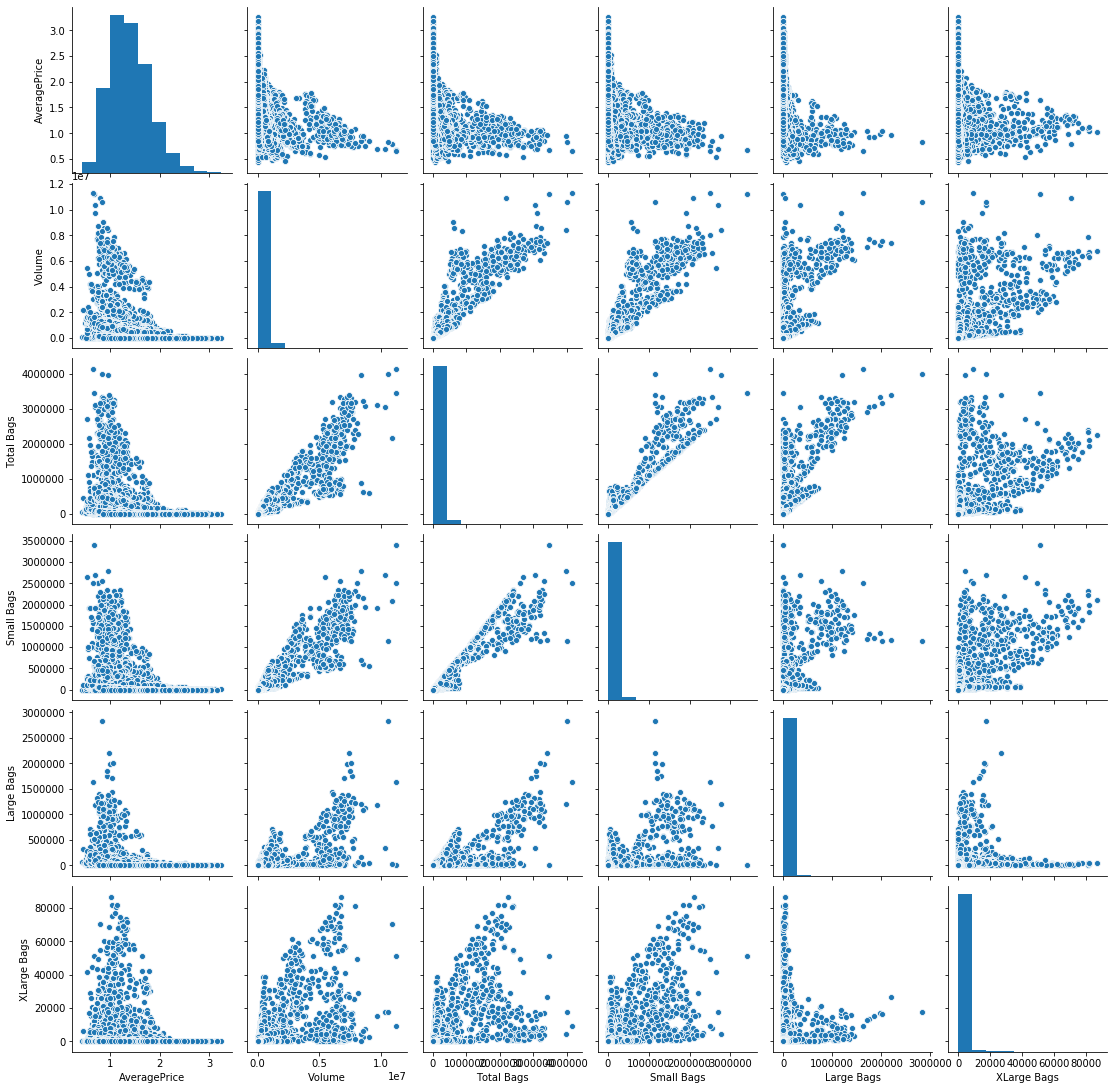

In [27]:
############# linear and logistic regression

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, scorer
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

data3.columns
cols=['AveragePrice','Volume',\
      'Total Bags','Small Bags','Large Bags','XLarge Bags']
sns.pairplot(data3[cols])

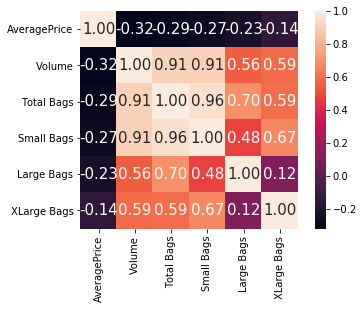

In [28]:
corr_matrix= np.corrcoef(data3[cols].values.T)
sns.heatmap(corr_matrix, cbar=True, annot=True, square =True,
           fmt='.2f', annot_kws={'size':15},
           yticklabels=cols, xticklabels=cols)
### total volume with total bags, small bags as well

In [29]:
x= data3.drop(['Total Bags','TN_PLU_4046_Sold',\
              'TN_PLU_4225_Sold','TN_PLU_4770_Sold',\
              'year','region','city','Volume','Date','State'], axis=1)

x.head()


,AveragePrice,Small Bags,Large Bags,XLarge Bags,type,Region
0,1.33,"8,603.62",93.25,0.00,conventional,Midwest
1,1.35,"9,408.07",97.49,0.00,conventional,Midwest
2,0.93,"8,042.21",103.14,0.00,conventional,Midwest
3,1.08,"5,677.40",133.76,0.00,conventional,Midwest
4,1.28,"5,986.26",197.69,0.00,conventional,Midwest


In [30]:
x_simple=np.array(x.AveragePrice).reshape(-1,1)
y_simple=np.array(data3.Volume).reshape(-1,1)
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(x_simple,y_simple, test_size=0.2)


In [31]:
simple_linear_regression= LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)
simple_linear_regression.fit(X_train_s,y_train_s)
simple_linear_regression.coef_
simple_linear_regression.intercept_
print("R-squared score: {:.4f}".format(simple_linear_regression.score(X_test_s,y_test_s)))

R-squared score: 0.1020


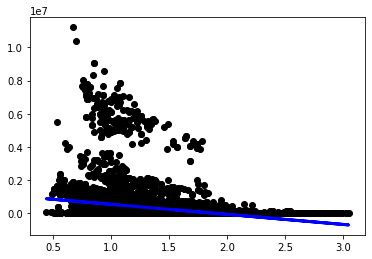

In [32]:
plt.scatter(X_test_s,y_test_s, color='black')
plt.plot(X_test_s, simple_linear_regression.predict(X_test_s), color='blue', linewidth=3)
### not a good model only one variable

In [33]:
X = pd.get_dummies(data=x, drop_first=True) ### conventional and midwest on the intercept
X_train, X_test, y_train, y_test = train_test_split(X,data3.Volume, test_size=0.2)

In [34]:
simple_linear_regression= LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)
simple_linear_regression.fit(X_train,y_train)
simple_linear_regression.coef_
simple_linear_regression.intercept_
print("R-squared score: {:.4f}".format(simple_linear_regression.score(X_test,y_test)))

R-squared score: 0.8466


In [35]:
linear_regression=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)
quadratic= PolynomialFeatures(degree=2)
X_train_2= quadratic.fit_transform(X_train)
X_test_2= quadratic.fit_transform(X_test)
linear_regression.fit(X_train_2,y_train)
print("R-squared score: {:.4f}".format(linear_regression.score(X_test_2,y_test)))

R-squared score: 0.8658


In [36]:
cubic= PolynomialFeatures(degree=3)
X_train_3= cubic.fit_transform(X_train)
X_test_3= cubic.fit_transform(X_test)
linear_regression.fit(X_train_3,y_train)
print("R-squared score: {:.4f}".format(linear_regression.score(X_test_3,y_test)))

R-squared score: 0.8843


In [37]:
#######################logistic#########################
### use it to predict either organic or conventional
x= data3.drop(['Total Bags','Small Bags','TN_PLU_4046_Sold',\
              'TN_PLU_4225_Sold','TN_PLU_4770_Sold',\
              'year','region','city','type','Date','State'], axis=1)
X = pd.get_dummies(data=x, drop_first=True)
y=data3.type
y = pd.Series([1 if i == "organic" else 0 for i in y])

# 1. Import the class you will use
from sklearn.preprocessing import StandardScaler

# 2. Create an instance of the class
scaler = StandardScaler()

numerical_features=['AveragePrice','Volume','Large Bags','XLarge Bags']
# 3. Use the fit method of the instance
scaler.fit(X[numerical_features])

X.loc[:,numerical_features] = scaler.transform(X[numerical_features])


In [38]:
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=.20, random_state=43)
logreg = LogisticRegression(C=1e5, solver='lbfgs')

logreg.fit(X_train, y_train)
print("W0: {}, W: {}".format(logreg.intercept_[0], logreg.coef_))
y_pred = logreg.predict(X_train)
accuracy_logreg = metrics.accuracy_score(y_train, y_pred)
accuracy_logreg


W0: -32.52779098559803, W: [[   1.24801369  -39.25413454    5.61485516 -109.98131166    0.61212899
     1.03991289    0.23079203]]


0.9614829819230887

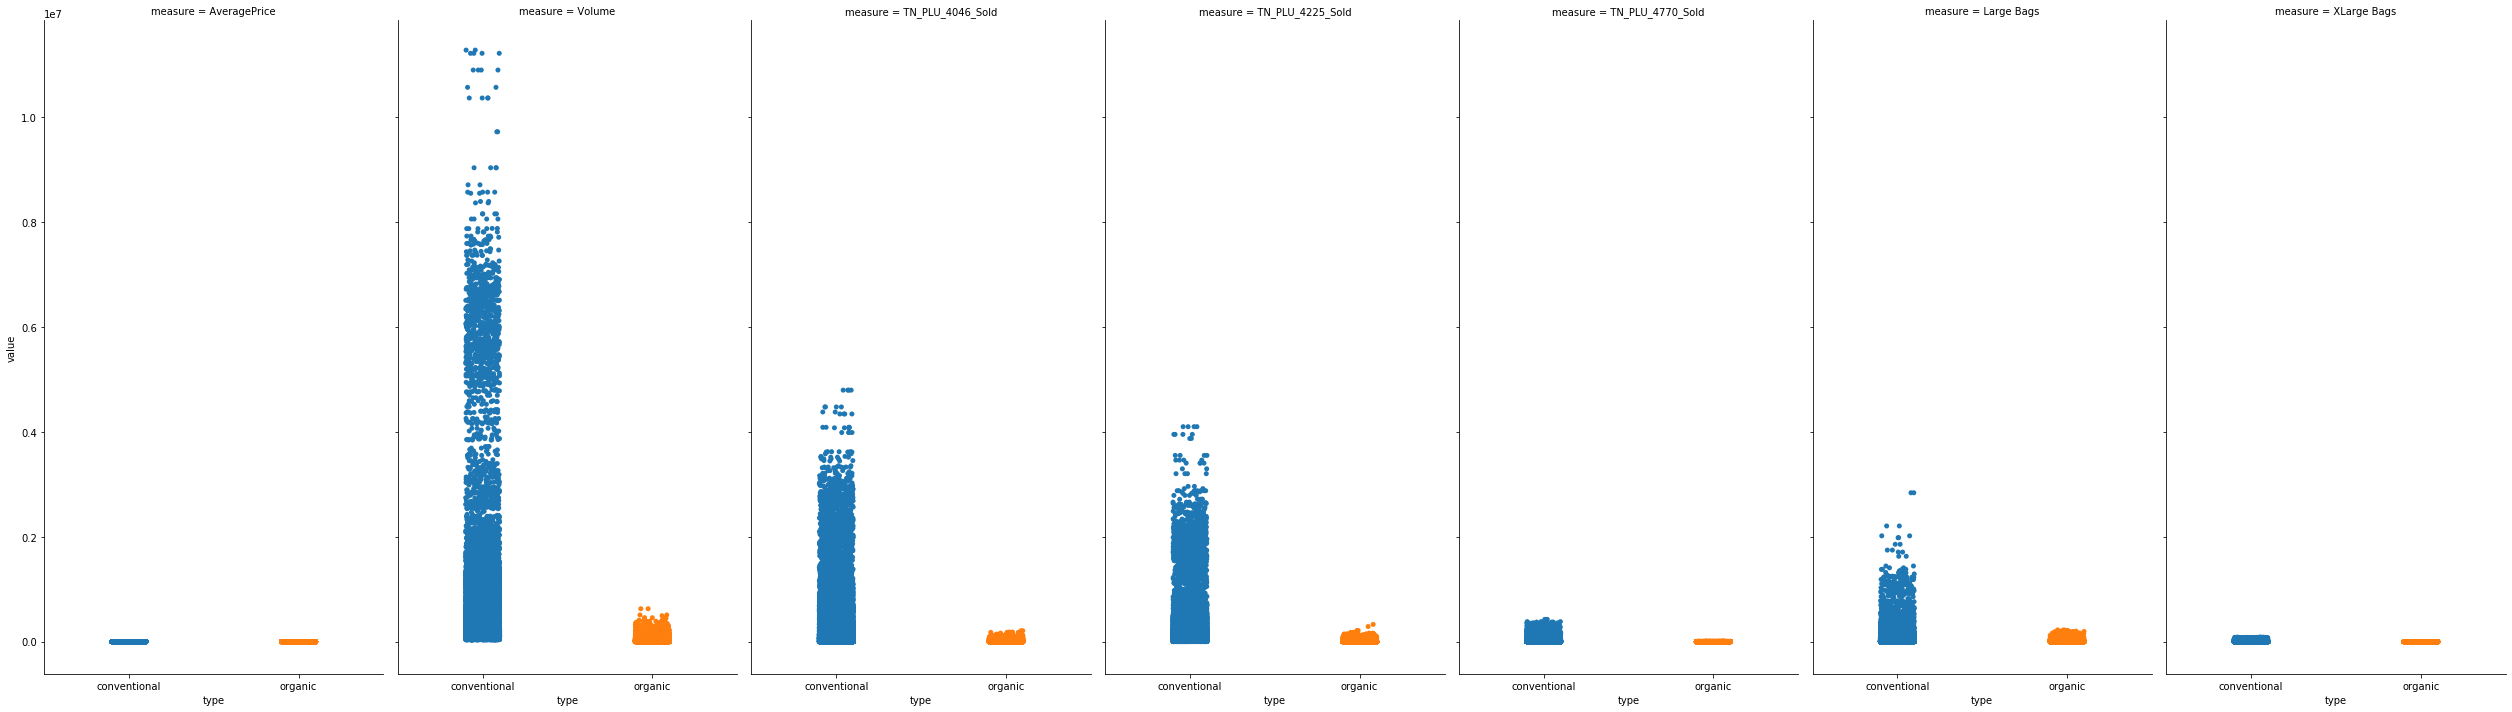

In [39]:
####PCA ANALYSYS FOR CONVENTIONAL OR ORGANIC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn_pandas import DataFrameMapper


datapca= data3.drop(['Total Bags','Small Bags','year','region','city','Date','State','Region'], axis=1)
datapca_long= pd.melt(datapca, id_vars=['type'], var_name='measure',\
                     value_name='value')
sns.catplot(x='type', y='value', hue='type', \
           height=10, aspect=.5, col='measure', data=datapca_long)
### we need to fix the scales
y= datapca.type
x= datapca.drop('type', axis=1)
X = pd.get_dummies(data=x)
y = pd.Series([1 if i == "organic" else 0 for i in y])

In [40]:
scaled_PCA= make_pipeline(StandardScaler(),PCA(n_components=1))
mapper = DataFrameMapper([(X.columns, StandardScaler())])
scaled_features = mapper.fit_transform(X.copy(), 4)
scaled_features_df = pd.DataFrame(scaled_features, index=X.index, columns=X.columns)

In [41]:
pca=PCA(n_components=1)
X_r= pca.fit(scaled_features_df).transform(scaled_features_df)
print(pca.explained_variance_ratio_) ### not much variance explained

[0.61230802]


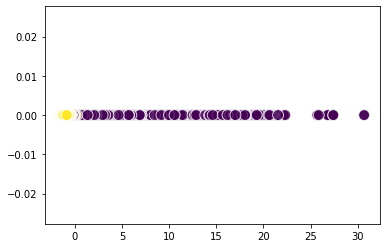

In [42]:
plt.scatter(X_r[:,0], np.zeros(X_r.shape[0]), c= np.array(y),\
           alpha = 0.8, s=120, marker='o', edgecolors='white')

In [43]:
pca2=PCA(n_components=2)
X_r2= pca2.fit(scaled_features_df).transform(scaled_features_df)
print(pca2.explained_variance_ratio_) ### not so good

[0.61230802 0.14038962]


Text(0, 0.5, '2nd principal component')

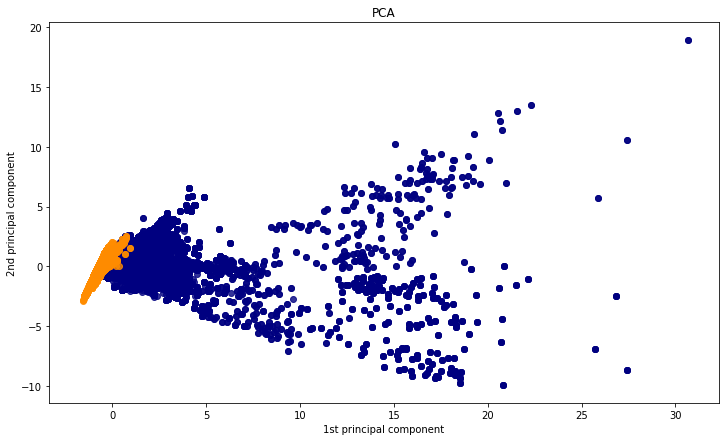

In [44]:
target_names=['conventiona','organic']
fig, ax = plt.subplots(1,figsize=(12,7))
colors= ['navy', 'darkorange']
lw=1

for color,i,target_name in zip(colors,[0,1],target_names):
    ax.scatter(X_r2[y==i,0], X_r2[y==i,1], alpha=.8, color=color,\
              label=target_names)
    
ax.set_title('PCA')
ax.set_xlabel('1st principal component')
ax.set_ylabel('2nd principal component')


In [45]:
pca6=PCA(n_components=6)
X_r6= pca6.fit(scaled_features_df).transform(scaled_features_df)
print(pca6.explained_variance_ratio_) ### price,volume, small 

[0.61230802 0.14038962 0.11506378 0.06467219 0.04413726 0.02221565]


In [46]:
### lets do some LDA since i want to use test the classification
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda= LinearDiscriminantAnalysis(n_components=1)
X_l= lda.fit(scaled_features_df,np.array(y)).transform(scaled_features_df)
print(lda.explained_variance_ratio_)

[1.]


Text(0.5, 0, '1st principal component')

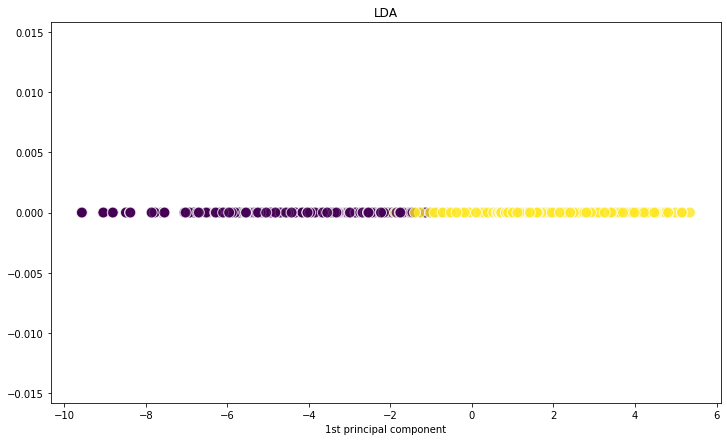

In [47]:
target_names=['conventiona','organic']
fig, ax = plt.subplots(1,figsize=(12,7))
colors= ['navy', 'darkorange']
lw=1

ax.scatter(X_l[:,0], np.zeros(X_l.shape[0]), c= np.array(y),\
           alpha = 0.8, s=120, marker='o', edgecolors='white')
    
ax.set_title('LDA')
ax.set_xlabel('1st principal component')

In [64]:
############ naive bayes
from sklearn.naive_bayes import GaussianNB
x_train, x_test, y_train, y_test = train_test_split(scaled_features_df,\
                                                   y, test_size=0.3, random_state=0)
scaled_cpa_g= make_pipeline(PCA(n_components=3), GaussianNB())
scaled_cpa_g.fit(x_train,y_train)
pred_test = scaled_cpa_g.predict(x_test)
NG=scaled_cpa_g.named_steps['gaussiannb']

In [65]:
print('Confussion Matrix')
print(metrics.confusion_matrix(y_test, pred_test))
print('\nF1 score: ','{:.2%}\n'.format(metrics.f1_score(y_test, pred_test)))
print('\nPrediction accuracy for the standardized test dataset with PCA')
print('{:.2%}\n'.format(metrics.accuracy_score(y_test, pred_test)))

Confussion Matrix
[[ 9477  2764]
 [  731 11466]]

F1 score:  86.77%


Prediction accuracy for the standardized test dataset with PCA
85.70%



In [53]:
###########Treees###############3
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz, plot_tree
import matplotlib.image as img 

In [54]:
clas_tree= DecisionTreeClassifier()
clas_tree= clas_tree.fit(x_train,y_train)
y_predicted= clas_tree.predict(x_test)

In [55]:
print('Confussion Matrix')
print(metrics.confusion_matrix(y_test, y_predicted))
print('\nF1 score: ','{:.2%}\n'.format(metrics.f1_score(y_test, y_predicted)))
print('\nPrediction accuracy for the classification')
print('{:.2%}\n'.format(metrics.accuracy_score(y_test, y_predicted)))
print("\nNumber of leaves:",clas_tree.get_n_leaves())
print("\nDepth of the tree:",clas_tree.get_depth())

Confussion Matrix
[[12228    13]
 [   14 12183]]

F1 score:  99.89%


Prediction accuracy for the classification
99.89%


Number of leaves: 177

Depth of the tree: 24


In [56]:
clas_tree2= DecisionTreeClassifier(random_state=0, max_depth=2)
clas_tree2= clas_tree2.fit(x_train,y_train)
y_predicted= clas_tree2.predict(x_test)

In [57]:
print('Confussion Matrix')
print(metrics.confusion_matrix(y_test, y_predicted))
print('\nF1 score: ','{:.2%}\n'.format(metrics.f1_score(y_test, y_predicted)))
print('\nPrediction accuracy for the classification')
print('{:.2%}\n'.format(metrics.accuracy_score(y_test, y_predicted)))
print("\nNumber of leaves:",clas_tree2.get_n_leaves())
print("\nDepth of the tree:",clas_tree2.get_depth())

Confussion Matrix
[[12187    54]
 [  412 11785]]

F1 score:  98.06%


Prediction accuracy for the classification
98.09%


Number of leaves: 4

Depth of the tree: 2


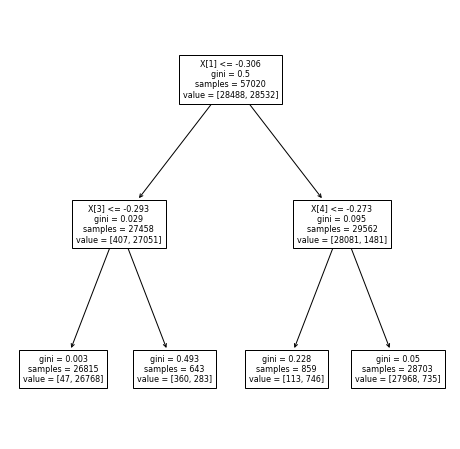

In [58]:
plt.figure(figsize=(8,8))
plot_tree(clas_tree2, fontsize=8);

In [59]:
import graphviz
dot_data = export_graphviz(clas_tree2, out_file=None,\
                           feature_names=x_test.columns,\
                           class_names=['Conventional','Organic'],\
                           filled=True, rounded=True,\
                           special_characters=True)

graph = graphviz.Source(dot_data, format="png")

graph.render("tree")

'tree.png'

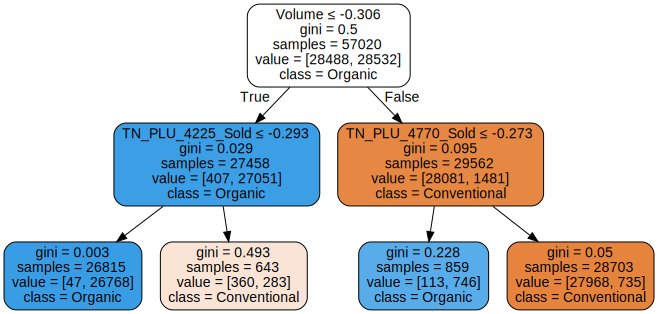

In [60]:
graph

In [61]:
#############SVM################3
from sklearn.svm import SVC 
svm_model= SVC(kernel='linear')
svm_model.fit(x_train,y_train)
y_fit= svm_model.predict(x_test)
print('Confussion Matrix')
print(metrics.confusion_matrix(y_test,y_fit))
print('\nF1 score: ','{:.2%}\n'.format(metrics.f1_score(y_test, y_fit)))
print('\nPrediction accuracy for the classification')
print('{:.2%}\n'.format(metrics.accuracy_score(y_test, y_fit)))

Confussion Matrix
[[12021   220]
 [  378 11819]]

F1 score:  97.53%


Prediction accuracy for the classification
97.55%



In [62]:
###############CLUSTERING############3

from sklearn.cluster import KMeans
scaled_features_df.head()
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(scaled_features_df)
centers = kmeans.cluster_centers_
print(centers)
print(np.unique(kmeans.labels_, return_counts=True))
results=np.unique(kmeans.labels_, return_counts=True)
results

[[ 0.99372346 -0.32990288 -0.30539904 -0.31141033 -0.26106248 -0.22105146
  -0.18798702]
 [-0.87609238  7.49436909  6.9598978   7.27669104  6.33813325  3.90087089
   4.77251509]
 [-1.14981158  1.22854386  1.36902898  0.97377935  0.96508019  1.00625277
   0.72008312]
 [-0.56482717 -0.12139357 -0.14852142 -0.09106084 -0.10509072 -0.081634
  -0.08471318]]
(array([0, 1, 2, 3]), array([32013,  1039,  6428, 41978], dtype=int64))


(array([0, 1, 2, 3]), array([32013,  1039,  6428, 41978], dtype=int64))

<BarContainer object of 4 artists>

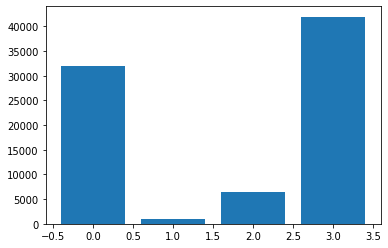

In [63]:
plt.bar(results[0],results[1])